In [12]:
import numpy as np
import astropy
import astropy.units as ur
import astropy.constants as cr
%matplotlib inline
from tdsat_sensitivity import find_limit, compute_snr
import matplotlib.pyplot as plt


In [34]:
# Set inputs here. Currently set at Ultrasat values to compare with Rick
qe = 0.7
exposure = 300*ur.s
psf_size = 6*ur.arcsec
efficiency = 0.7



td1_band = [180, 220]*ur.nm



# td2_band = [260, 320]*ur.nm
# td3_band = [340, 380]*ur.nm

AB = 22*ur.ABmag


snr = 1
target = 10.

area_vs_dc = []
diameter = 29*ur.cm

dc_arr = [0.001,0.005, 0.01, 0.03, 0.06, 0.1,0.2, 0.25]
for dc in dc_arr:
    snr = compute_snr(td1_band, AB, diameter = diameter, psf_size= psf_size, dark_current = dc * (1/ur.s))
#    print('Starting SNR: {}'.format(snr))
    while( (target - snr) > 0.1):
        diameter += 0.5 *ur.cm    
        snr = compute_snr(td1_band, AB, diag=False, diameter=diameter,
                          psf_size=psf_size, dark_current = dc * (1/ur.s))

    print('Found SNR: {} for {} diameter'.format(snr, diameter))
#     snr = compute_snr(td1_band, AB, diag=True, bgd_elec_diag = True,
#                       dark_current = dc * (1/ur.s),diameter=diameter, psf_size=psf_size)
    area_vs_dc.append(diameter.value)
    
    diameter = (diameter.value - 0.5)*ur.cm


Found SNR: 10.050166150682543 for 30.0 cm diameter
Found SNR: 9.94794290398101 for 30.0 cm diameter
Found SNR: 10.085768782413448 for 30.5 cm diameter
Found SNR: 10.142363531669256 for 31.5 cm diameter
Found SNR: 10.044983393848746 for 32.5 cm diameter
Found SNR: 10.102786210761572 for 34.0 cm diameter
Found SNR: 9.956461855828298 for 36.5 cm diameter
Found SNR: 10.109991361719882 for 38.0 cm diameter


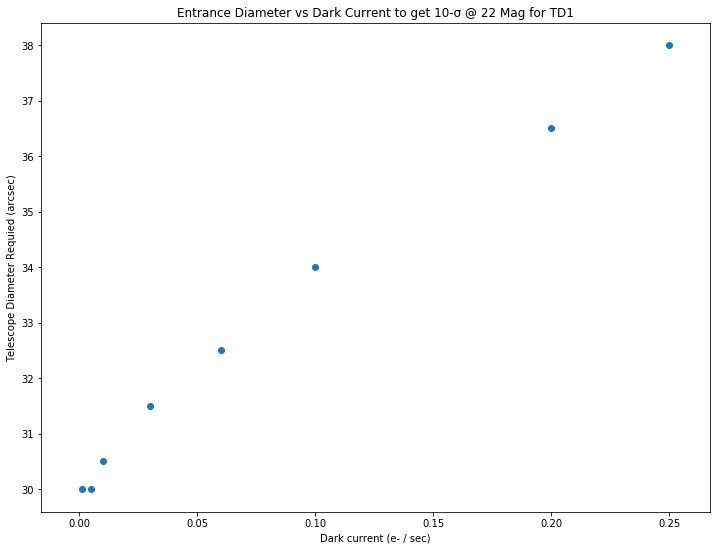

In [39]:
f = plt.figure(figsize=[12, 9])

plt.scatter(dc_arr, area_vs_dc)
plt.title('Entrance Diameter vs Dark Current to get 10-σ @ 22 Mag for TD1')
plt.ylabel('Telescope Diameter Requied (arcsec)')
plt.xlabel('Dark current (e- / sec)')
plt.show()
f.savefig('area_vs_darkcurrent.pdf')
